GEOMETRIC RECTIFICATION

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def display_image(image, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def bilinear_interpolation(image, x, y):
    x1, y1 = int(x), int(y)
    x2, y2 = min(x1+1, image.shape[1]-1), min(y1+1, image.shape[0]-1)

    R1 = (x2 - x) * image[y1, x1] + (x - x1) * image[y1, x2]
    R2 = (x2 - x) * image[y2, x1] + (x - x1) * image[y2, x2]
    P = (y2 - y) * R1 + (y - y1) * R2

    return P

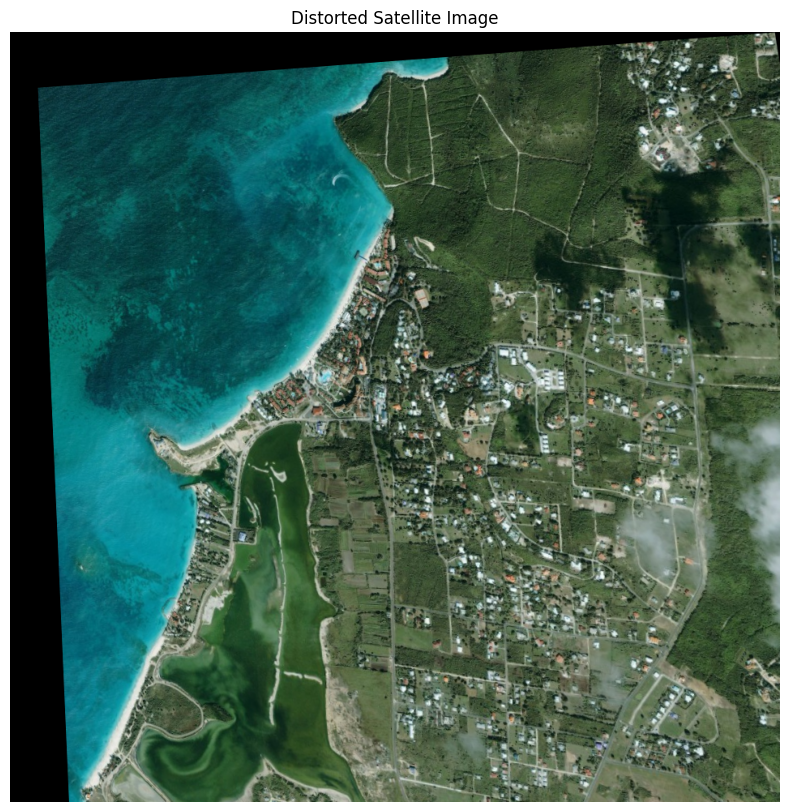

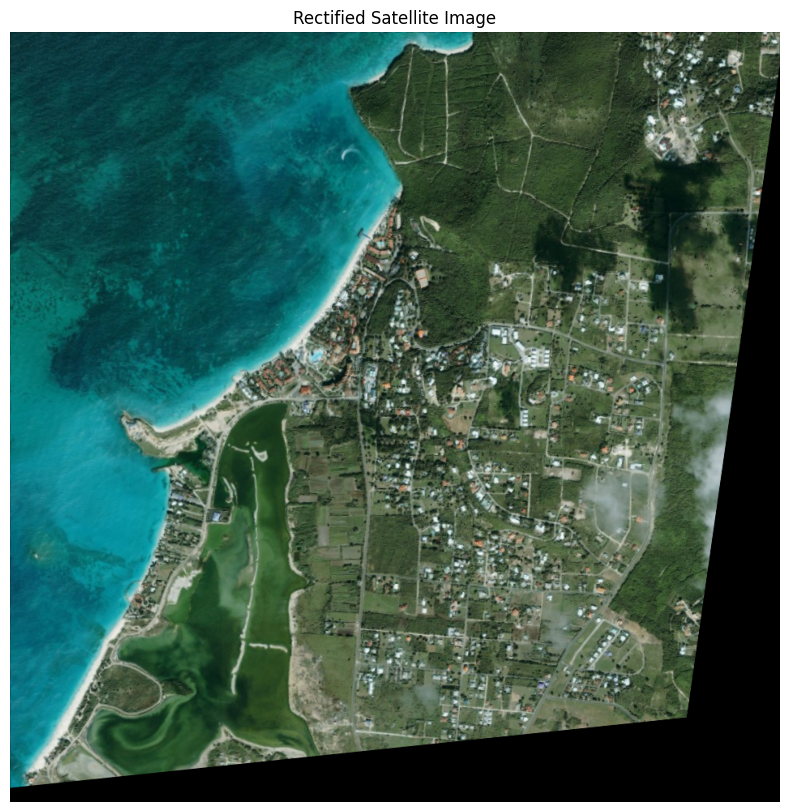

In [9]:
# Task 1: Satellite Image Rectification
satellite_img = cv2.imread('/stunning-images-earth-captured-by-geoeye-1-satellite.jpg')

original_points = np.float32([[100, 100], [500, 100], [100, 500], [500, 500]])
distorted_points = np.float32([[120, 150], [480, 130], [140, 520], [520, 530]])

distortion_matrix = cv2.getPerspectiveTransform(original_points, distorted_points)
distorted_img_satellite = cv2.warpPerspective(satellite_img, distortion_matrix, (satellite_img.shape[1], satellite_img.shape[0]))

display_image(distorted_img_satellite, title='Distorted Satellite Image')

gcps_distorted = distorted_points
gcps_rectified = original_points

transformation_matrix = cv2.getPerspectiveTransform(gcps_distorted, gcps_rectified)

rectified_img_satellite = cv2.warpPerspective(distorted_img_satellite, transformation_matrix, (satellite_img.shape[1], satellite_img.shape[0]))

display_image(rectified_img_satellite, title='Rectified Satellite Image')


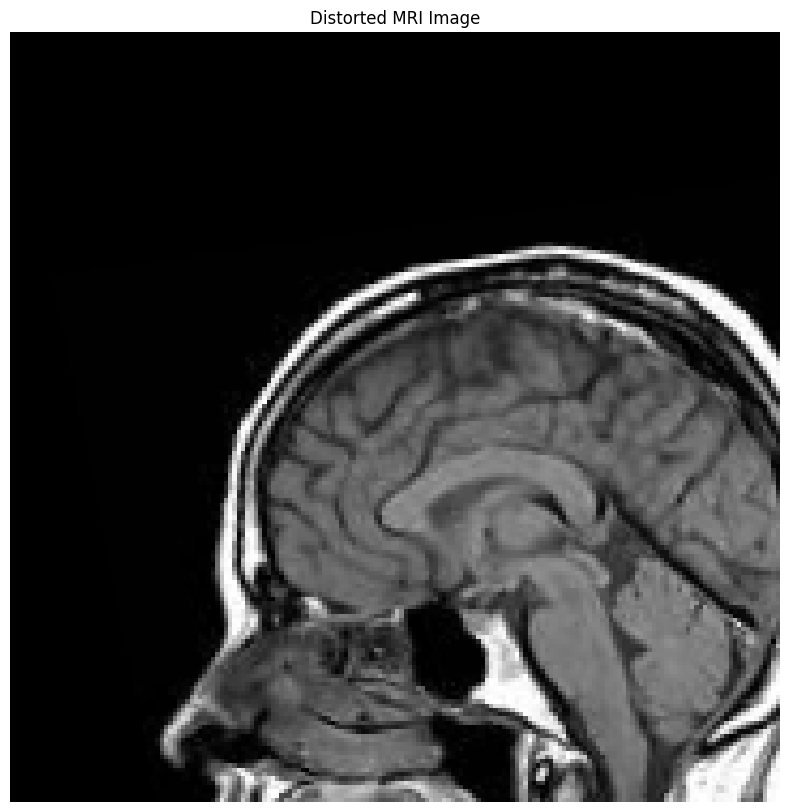

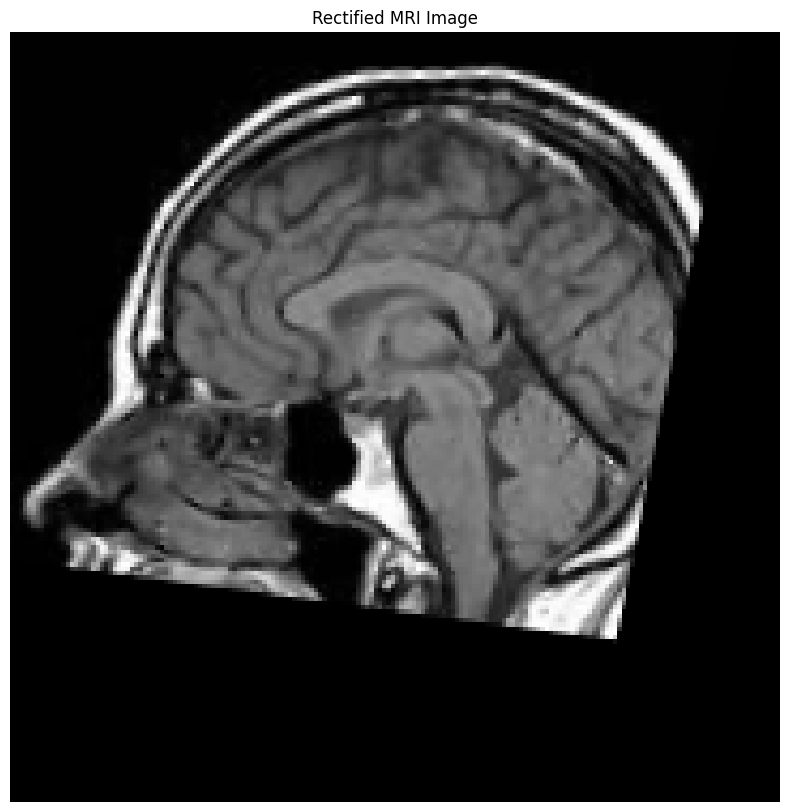

In [6]:
# Task 2: MRI Image Rectification
mri_img = cv2.imread('/th (2).jpeg')

rows, cols, _ = mri_img.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[70, 100], [220, 80], [100, 250]])

affine_matrix = cv2.getAffineTransform(pts1, pts2)
distorted_img_mri = cv2.warpAffine(mri_img, affine_matrix, (cols, rows))

display_image(distorted_img_mri, title='Distorted MRI Image')

keypoints_distorted = pts2
keypoints_reference = pts1

transformation_matrix_mri = cv2.getAffineTransform(keypoints_distorted, keypoints_reference)

rectified_img_mri = cv2.warpAffine(distorted_img_mri, transformation_matrix_mri, (cols, rows))

display_image(rectified_img_mri, title='Rectified MRI Image')

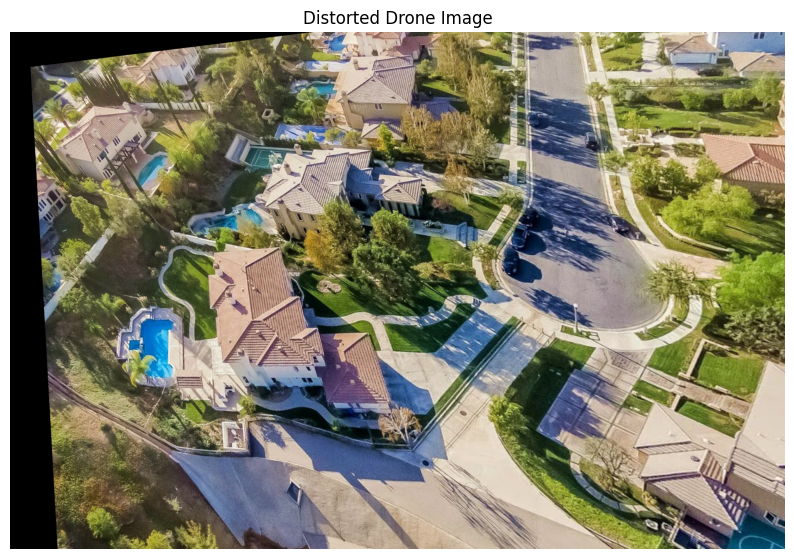

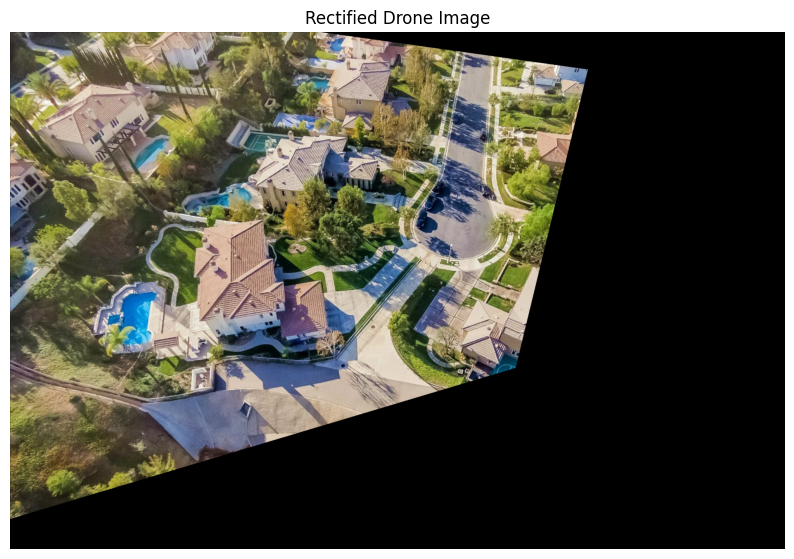

In [8]:
# Task 3: Drone Image Rectification
drone_img = cv2.imread('/Drone-captured-Images-Residences.png')

original_points = np.float32([[100, 100], [400, 100], [100, 400], [400, 400]])
distorted_points = np.float32([[120, 150], [380, 130], [140, 430], [420, 450]])

distortion_matrix = cv2.getPerspectiveTransform(original_points, distorted_points)
distorted_img_drone = cv2.warpPerspective(drone_img, distortion_matrix, (drone_img.shape[1], drone_img.shape[0]))

display_image(distorted_img_drone, title='Distorted Drone Image')

control_points_distorted = distorted_points
control_points_rectified = original_points

transformation_matrix_drone = cv2.getPerspectiveTransform(control_points_distorted, control_points_rectified)

rectified_img_drone = cv2.warpPerspective(distorted_img_drone, transformation_matrix_drone, (drone_img.shape[1], drone_img.shape[0]))

display_image(rectified_img_drone, title='Rectified Drone Image')

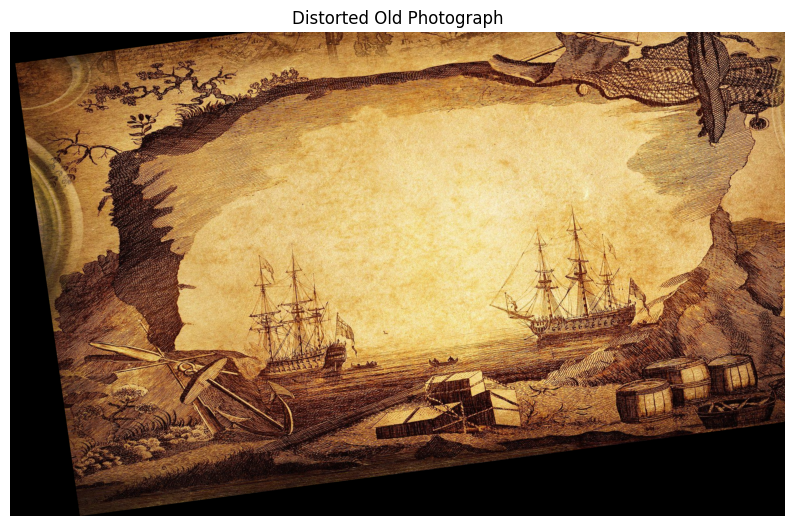

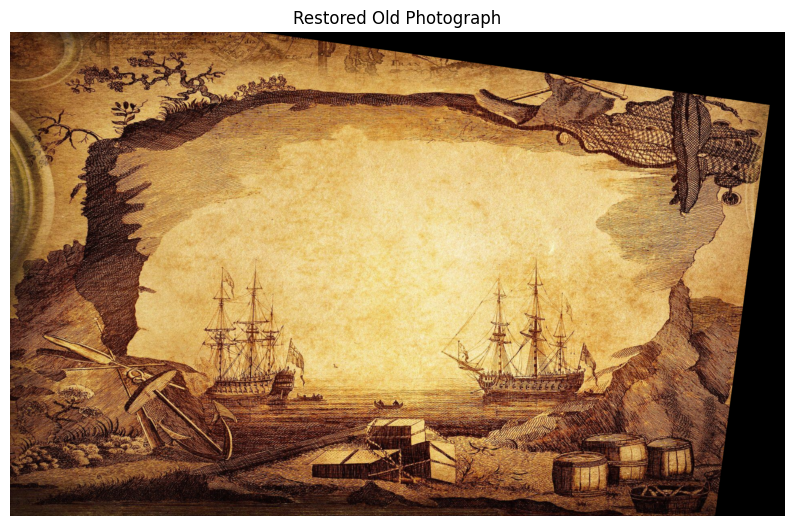

In [10]:
# Task 4: Historical Photo Restoration
old_photo = cv2.imread('/5731979.jpg')

rows, cols, _ = old_photo.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[70, 120], [220, 100], [90, 260]])

affine_matrix = cv2.getAffineTransform(pts1, pts2)
distorted_img_old_photo = cv2.warpAffine(old_photo, affine_matrix, (cols, rows))

display_image(distorted_img_old_photo, title='Distorted Old Photograph')

keypoints_old = pts2
keypoints_reference_photo = pts1

transformation_matrix_old_photo = cv2.getAffineTransform(keypoints_old, keypoints_reference_photo)

rectified_img_old_photo = cv2.warpAffine(distorted_img_old_photo, transformation_matrix_old_photo, (cols, rows))

display_image(rectified_img_old_photo, title='Restored Old Photograph')

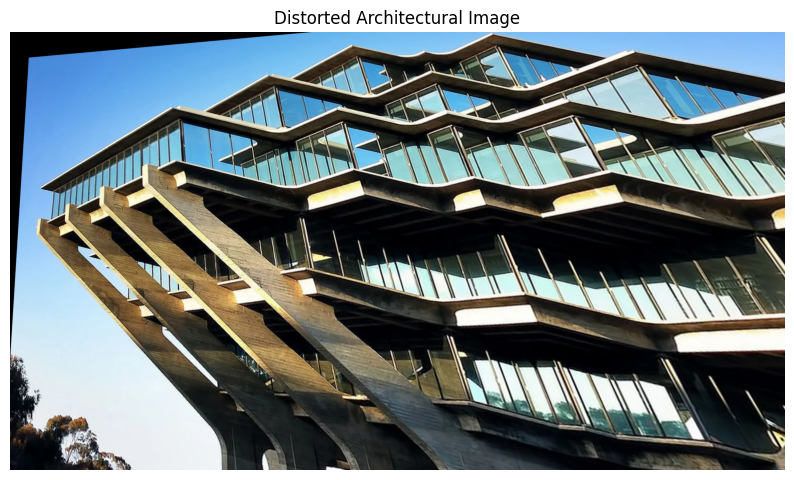

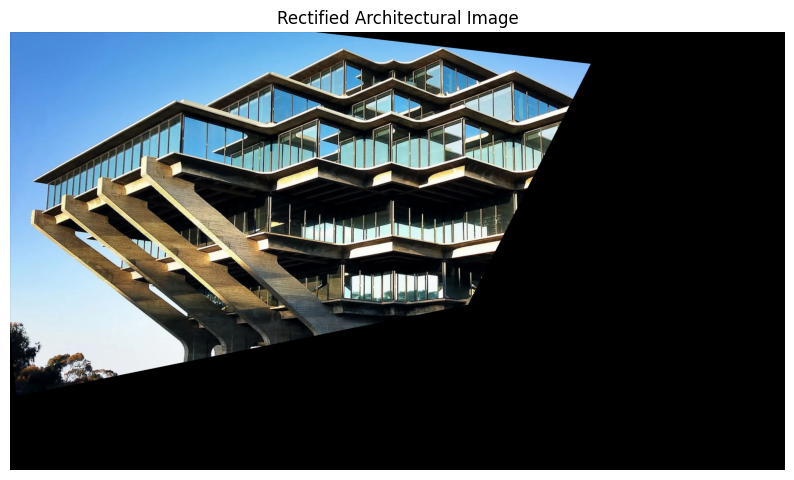

In [11]:
# Task 5: Architectural Image Rectification
arch_img = cv2.imread('/636453250029453109-Geisel-Library-O-Palsson-Flickr-CC-BY-2.0.webp')

original_points = np.float32([[150, 200], [600, 200], [150, 600], [600, 600]])
distorted_points = np.float32([[180, 250], [580, 230], [170, 630], [620, 650]])

distortion_matrix = cv2.getPerspectiveTransform(original_points, distorted_points)
distorted_img_arch = cv2.warpPerspective(arch_img, distortion_matrix, (arch_img.shape[1], arch_img.shape[0]))

display_image(distorted_img_arch, title='Distorted Architectural Image')

keypoints_arch_distorted = distorted_points
keypoints_arch_known = original_points

transformation_matrix_arch = cv2.getPerspectiveTransform(keypoints_arch_distorted, keypoints_arch_known)

rectified_img_arch = cv2.warpPerspective(distorted_img_arch, transformation_matrix_arch, (arch_img.shape[1], arch_img.shape[0]))

display_image(rectified_img_arch, title='Rectified Architectural Image')